### Code to plot a telemetry profile - Running this notebook with plot the most recent saved data that you generated
#### 2021 0128 CJH
#### See telemetry_plot.ipynb for more information
---
* Imports a file with helper function definitions `import telemetry_plot_utils as tpu ` 
* Reads data from the robot/sim/data folder with `telemetry = tpu.load_file(file)`
* Converts that data to a useful pandas dataframe with `df = tpu.fix_data(telemetry)`
  * `df, telemetry = tpu.get_data(file_name='20210130_151440', x_offset=0, y_offset=0.0)` combines the load and table functions
* Gets a list of the pathweaver points with `df_points = tpu.get_points_df(name='bounce')`
* Plots them all together with plot_df, e.g. `tpu.plot_df(df_slalom_weave, telemetry_slalom_weave, point_df=df_slalom_points, background='slalom', arrows=True, save=False)`
* Plots the velocity profiles with e.g. `tpu.velocity_plot(df_slalom_weave)`

In [5]:
#from networktables import NetworkTables
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import pickle
import glob
from pathlib import Path
from importlib import reload

In [6]:
import telemetry_plot_utils as tpu 

In [34]:
robot_dir = Path(r'C:\Cory\CJH Shared\Python\FRC\2022\robot')
reload(tpu)
print(f'tpu.robot_dir is {tpu.robot_dir}')
tpu.set_path(robot_dir)

tpu.robot_dir is None
Robot dir set to C:\Cory\CJH Shared\Python\FRC\2022\robot


### loading point lists from pathweaver files - use this explicitly if the 'guess' option fails
* just pass the function the unique part of the name of the file you want the points for and this gets plotted on the summary

In [155]:
path_weaver_files = data_files = tpu.get_paths()
path_weaver_files

['C:\\Cory\\CJH Shared\\Python\\FRC\\2022\\robot\\pathweaver\\paths\\2_circle',
 'C:\\Cory\\CJH Shared\\Python\\FRC\\2022\\robot\\pathweaver\\paths\\2_meters',
 'C:\\Cory\\CJH Shared\\Python\\FRC\\2022\\robot\\pathweaver\\paths\\balls',
 'C:\\Cory\\CJH Shared\\Python\\FRC\\2022\\robot\\pathweaver\\paths\\barrel_pw1',
 'C:\\Cory\\CJH Shared\\Python\\FRC\\2022\\robot\\pathweaver\\paths\\bounce_pw4',
 'C:\\Cory\\CJH Shared\\Python\\FRC\\2022\\robot\\pathweaver\\paths\\calibrate',
 'C:\\Cory\\CJH Shared\\Python\\FRC\\2022\\robot\\pathweaver\\paths\\calibrate_rev',
 'C:\\Cory\\CJH Shared\\Python\\FRC\\2022\\robot\\pathweaver\\paths\\field_cal',
 'C:\\Cory\\CJH Shared\\Python\\FRC\\2022\\robot\\pathweaver\\paths\\hub_to_ball',
 'C:\\Cory\\CJH Shared\\Python\\FRC\\2022\\robot\\pathweaver\\paths\\slalom_pw4_smooth',
 'C:\\Cory\\CJH Shared\\Python\\FRC\\2022\\robot\\pathweaver\\paths\\terminal_to_shot',
 'C:\\Cory\\CJH Shared\\Python\\FRC\\2022\\robot\\pathweaver\\paths\\two_ball_traversal']

In [15]:
df_points = tpu.get_points_df(name='slalom')
df_points.head()

,X,Y,Tangent X,Tangent Y,Fixed Theta,Reversed,Name
0,1.100000,0.693851,3.118779,0.110262,True,False,NaN
1,3.255297,2.464733,2.023144,0.469742,True,False,NaN
2,6.663729,2.139729,0.656770,-1.843370,True,False,NaN
3,7.830422,0.735519,1.476942,0.074113,True,False,NaN
4,7.620639,2.348860,-2.129211,-0.742971,True,False,NaN


#### trick to get all four bounce paths in one point list

In [20]:
bounces = ['bounce_pw'+str(i+1) for i in range(4)]
dfs = []
for bounce_file in bounces:
    dfs.append(tpu.get_points_df(name=bounce_file))
df_bounce_points = pd.concat(dfs)
df_bounce_points

,X,Y,Tangent X,Tangent Y,Fixed Theta,Reversed,Name
0,6.851779,3.465090,-0.010706,0.425696,True,True,NaN
1,7.133304,1.942387,-0.536946,0.338077,True,True,NaN
2,8.148597,1.849560,-0.258530,0.000000,True,True,NaN


#### trick to get multiple paths in one point list

In [118]:
traversal = ['hub_to_ball', 'two_ball_traversal', 'terminal_to_shot']
dfs = []
for traversal_file in traversal:
    dfs.append(tpu.get_points_df(name=traversal_file))
df_traversal_points = pd.concat(dfs)
df_traversal_points

,X,Y,Tangent X,Tangent Y,Fixed Theta,Reversed,Name
0,7.819413,-5.335819,-0.668212,-1.778307,True,False,NaN
1,7.646971,-7.729600,-0.010778,-0.495770,True,False,NaN
0,7.576293,-7.932616,-0.500000,0.100000,True,False,AfterRotate
1,5.035166,-6.321169,-1.994144,0.525215,False,False,FirstBall
2,1.514507,-6.726131,-0.366439,-0.334106,True,False,TerminalBall
0,1.192485,-7.027726,-0.285102,-0.309894,True,True,TerminalBall
1,3.299762,-6.717833,-1.636238,-0.037187,True,True,NaN
2,6.931714,-7.139288,-0.904889,-1.623842,True,True,ShotLocation


#### generate all point paths

In [167]:
names = [Path(f).name for f in path_weaver_files]
point_dfs = {}
for f in names:
    point_dfs.update({f:tpu.get_points_df(name=f, x_shift=0, y_shift=0)})
point_dfs.keys()

dict_keys(['2_circle', '2_meters', 'balls', 'barrel_pw1', 'bounce_pw4', 'calibrate', 'calibrate_rev', 'field_cal', 'hub_to_ball', 'slalom_pw4_smooth', 'terminal_to_shot', 'two_ball_traversal'])

In [168]:
df_data, telemetry = tpu.get_data(file_name=-1, x_offset=0, y_offset=0)
df_data.columns

Index(['TIME', 'RBT_X', 'RBT_Y', 'RBT_TH', 'RBT_VEL', 'RBT_RVEL', 'RBT_LVEL',
       'TRAJ_X', 'TRAJ_Y', 'TRAJ_TH', 'TRAJ_VEL', 'RAM_VELX', 'RAM_LVEL_SP',
       'RAM_RVEL_SP', 'RAM_OM', 'LFF', 'RFF', 'LPID', 'RPID', 'DELTA', 'VEC_X',
       'VEC_Y'],
      dtype='object')

In [169]:
df_data.head()

,TIME,RBT_X,RBT_Y,RBT_TH,RBT_VEL,RBT_RVEL,RBT_LVEL,TRAJ_X,TRAJ_Y,TRAJ_TH,...,RAM_LVEL_SP,RAM_RVEL_SP,RAM_OM,LFF,RFF,LPID,RPID,DELTA,VEC_X,VEC_Y
0,0.039328,1.443429,1.472509,-2.231072,0.043646,0.086817,0.000476,1.194088,1.191951,-2.323824,...,0.083354,-0.022357,-0.173411,1.638072,-0.652312,0.004144,-0.005459,0.041200,-0.026559,-0.031497
1,0.140004,1.417668,1.440357,-2.271342,0.843782,0.306201,1.381363,1.211595,1.208594,-2.470953,...,1.990632,0.063789,-3.160832,2.333851,-1.605082,0.030463,-0.012121,0.041200,-0.026559,-0.031497
2,0.239757,1.376864,1.398863,-2.471965,0.261808,-0.442884,0.966500,1.241985,1.227282,-2.680962,...,1.069338,-0.498640,-2.572142,-1.275200,-2.433797,0.005142,-0.002788,0.058196,-0.045628,-0.036122
3,0.339221,1.383516,1.401773,-2.685682,-0.360159,-0.869529,0.149211,1.295757,1.248564,-2.814961,...,0.136315,-0.772374,-1.490632,-1.554115,-2.070064,-0.000645,0.004858,0.007261,-0.006519,-0.003197
4,0.439514,1.434935,1.421764,-2.831489,-0.691658,-1.016403,-0.366913,1.370379,1.269830,-2.882254,...,-0.302917,-0.853451,-0.903108,-1.779876,-1.819233,0.003200,0.008148,0.055169,-0.052537,-0.016835


---
#### Plot the most recent trajectory - you have to run the ramsete command and select "write_data" to be true in the dashboard to save data
* To plot something else, change the filename in tpu.getdata().  It defaults to finding the most recent file in robot/sim/data.
* Now it is guessing which set of points you need if you set `guess_points=True`.  Set to false and it will use the point_df you specify
* Don't use guess on bounce yet

In [175]:
pix_per_m =  16.4 / 1711
left_offset =  66 * pix_per_m
right_offset =  79 * pix_per_m
(left_offset, right_offset)

(0.6326125073056692, 0.757218001168907)

In [176]:
pix_per_m =  8.23 / 865
top_offset =  43 * pix_per_m
bottom_offset =  42 * pix_per_m
(top_offset, bottom_offset)

(0.409121387283237, 0.39960693641618494)

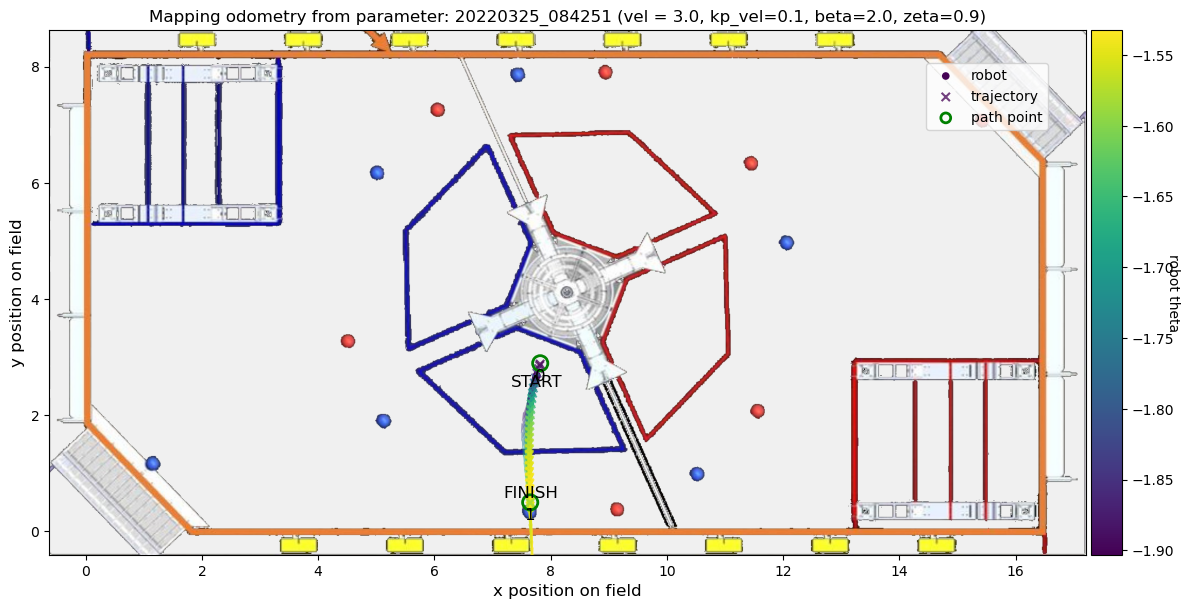

In [180]:
# get the latest trajectory
reload(tpu); tpu.set_path(robot_dir)
df_data, telemetry = tpu.get_data(file_name=-3, x_offset=0, y_offset=0)
tpu.plot_df(df_data, telemetry, guess_points=False, point_df=point_dfs['hub_to_ball'], background='white', arrows=True, save=False)
#tpu.velocity_plot(df_data)

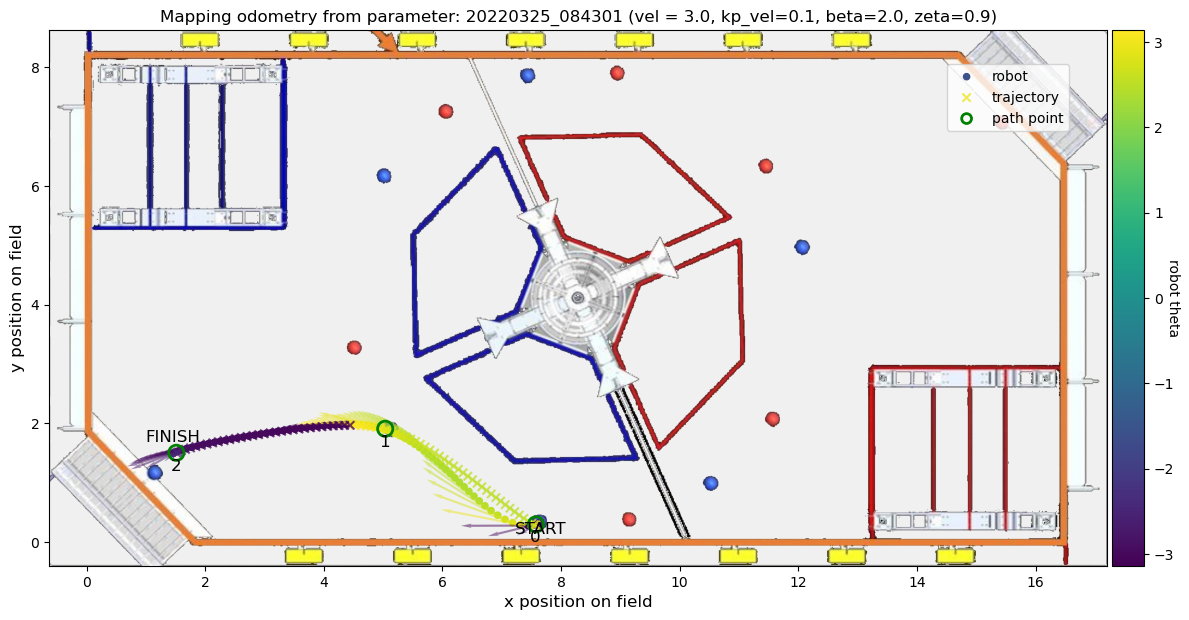

In [178]:
# get the latest trajectory
reload(tpu); tpu.set_path(robot_dir)
df_data, telemetry = tpu.get_data(file_name=-2, x_offset=0, y_offset=0)
tpu.plot_df(df_data, telemetry, guess_points=False, point_df=point_dfs['two_ball_traversal'], background='white', arrows=True, save=False)
#tpu.velocity_plot(df_data)

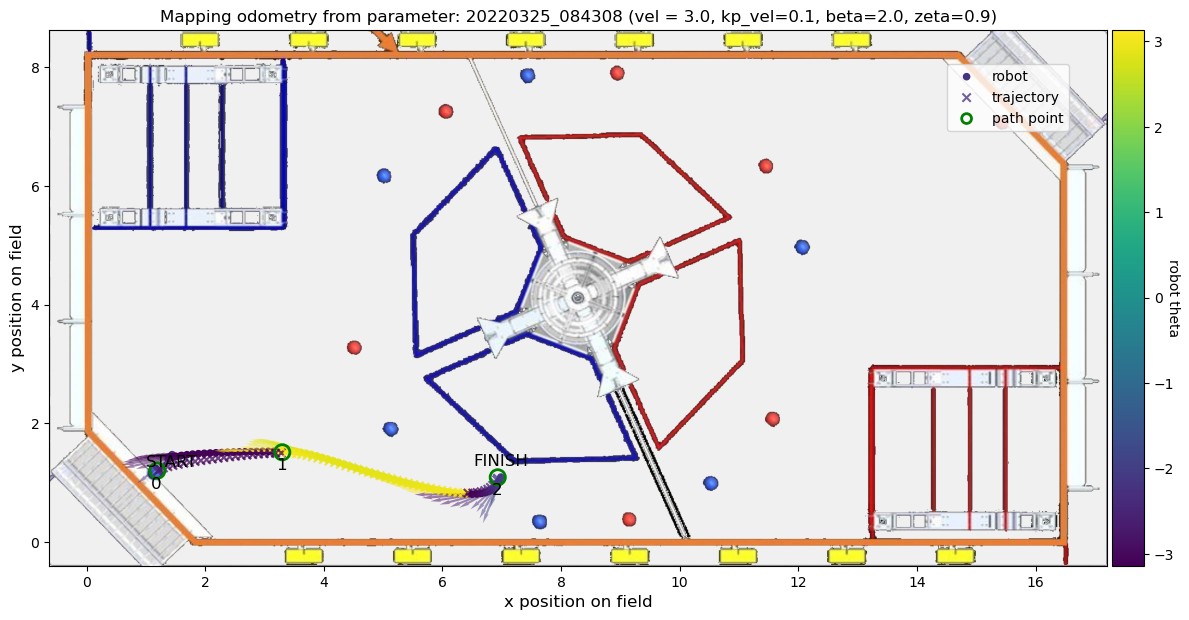

In [179]:
# get the latest trajectory
reload(tpu); tpu.set_path(robot_dir)
df_data, telemetry = tpu.get_data(file_name=-1, x_offset=0, y_offset=0)
tpu.plot_df(df_data, telemetry, guess_points=False, point_df=point_dfs['terminal_to_shot'], background='white', arrows=True, save=False)
#tpu.velocity_plot(df_data)

### old stuff, don't execute.  2021 stuff is broken in the 2022 version for now

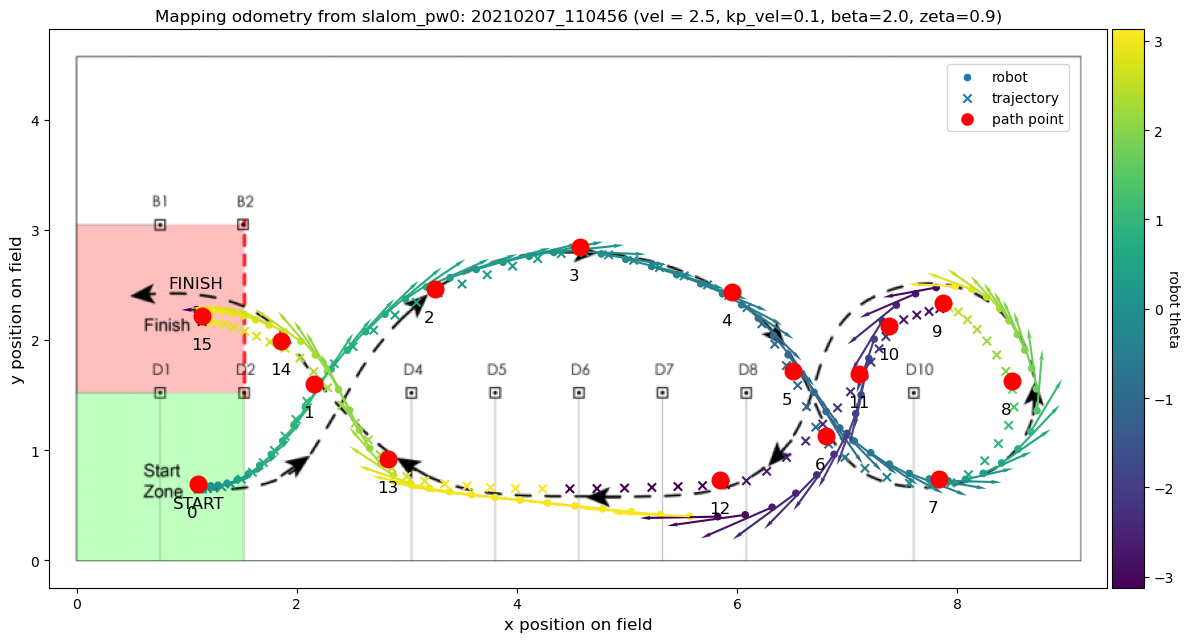

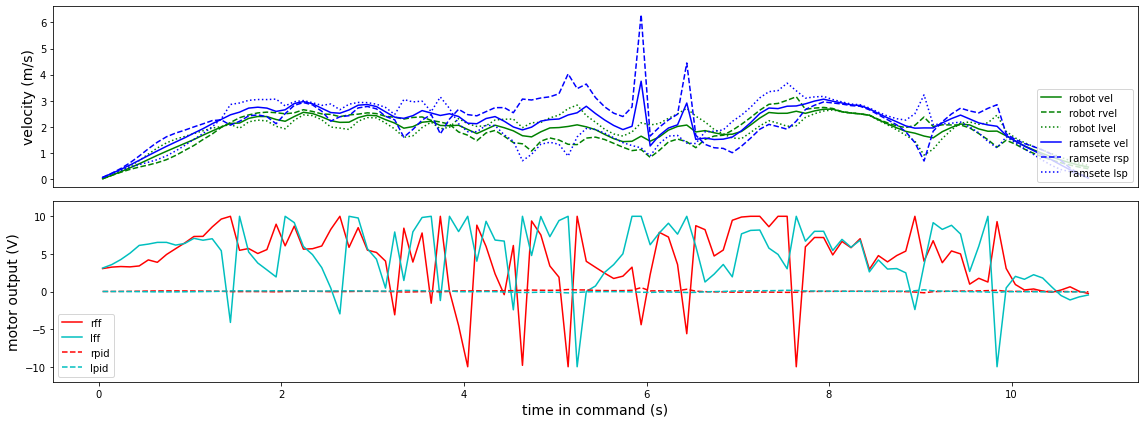

In [ ]:
# get the latest trajectory
reload(tpu)
df_data, telemetry = tpu.get_data(file_name=-2, x_offset=0, y_offset=0)
tpu.plot_df(df_data, telemetry, guess_points=True, point_df=df_points, background='slalom', arrows=True, save=False)
tpu.velocity_plot(df_data)

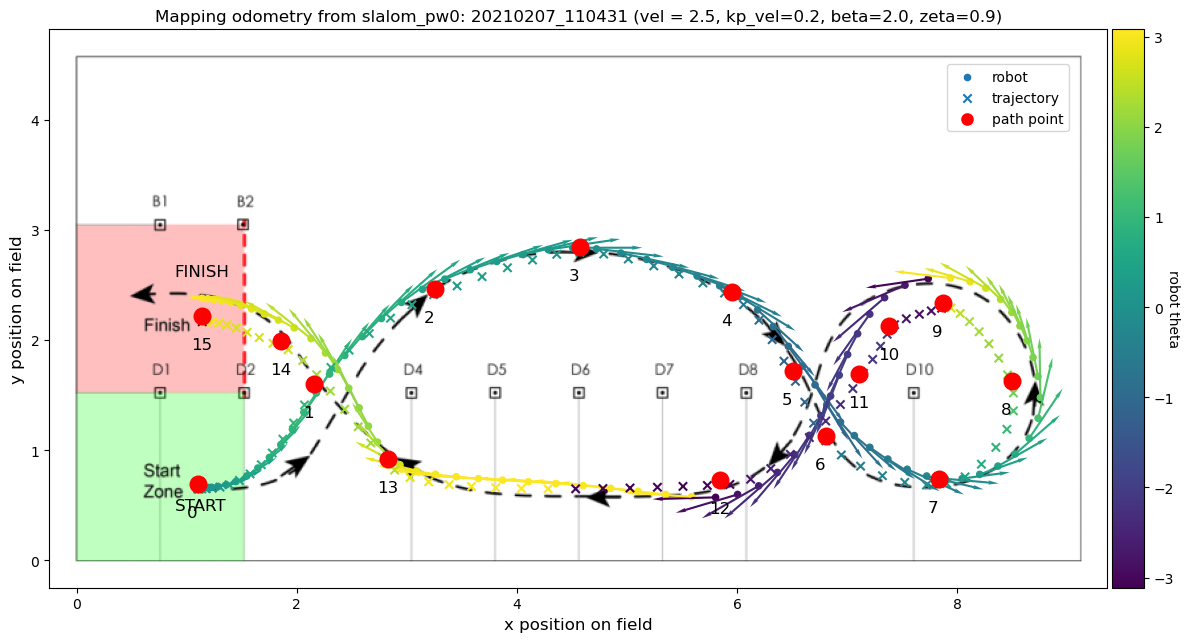

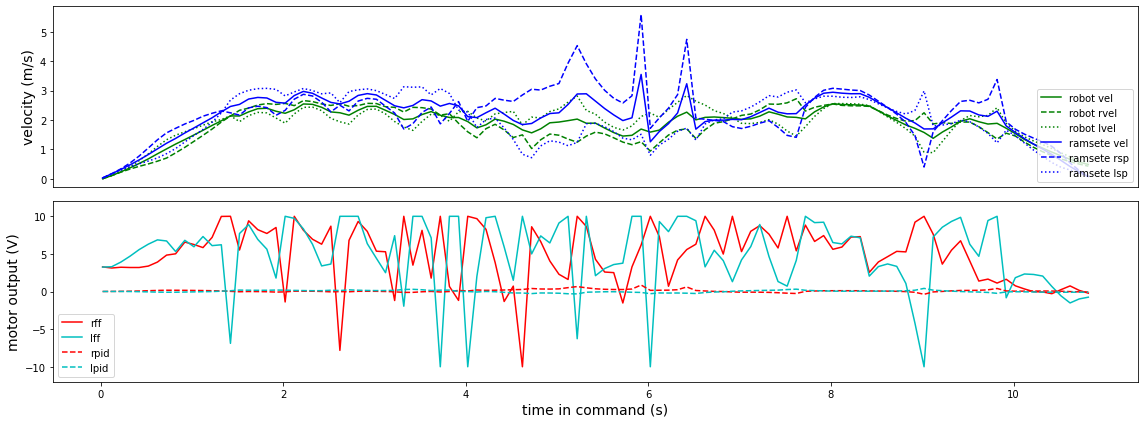

In [ ]:
# get the latest trajectory
reload(tpu)
df_data, telemetry = tpu.get_data(file_name=-3, x_offset=0, y_offset=0)
tpu.plot_df(df_data, telemetry, guess_points=True, point_df=df_points, background='slalom', arrows=True, save=False)
tpu.velocity_plot(df_data)

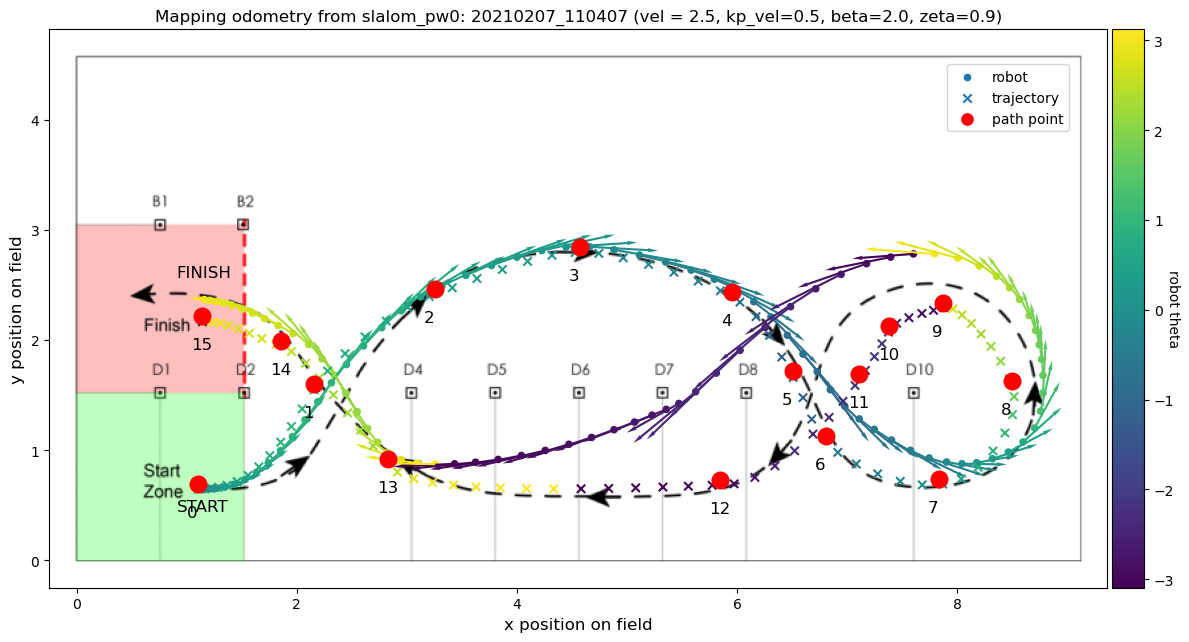

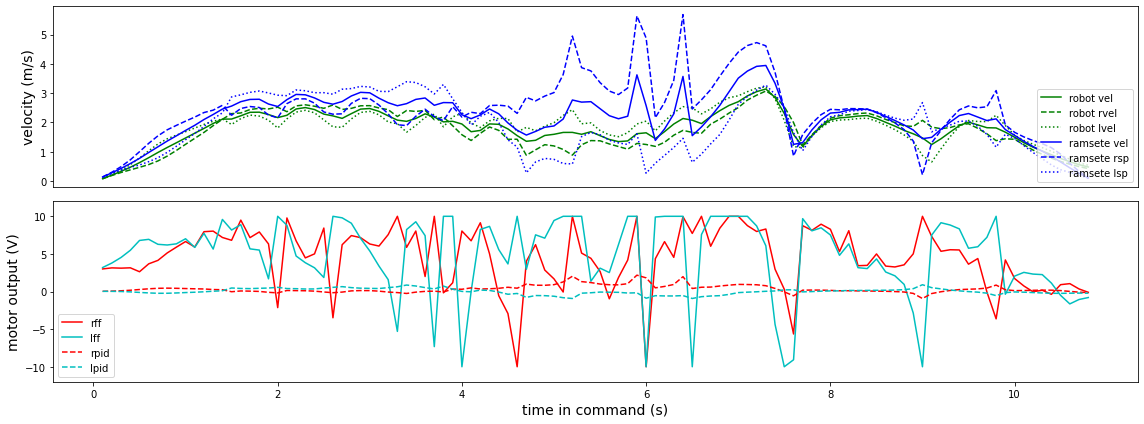

In [64]:
# get the latest trajectory
reload(tpu)
df_data, telemetry = tpu.get_data(file_name=-4, x_offset=0, y_offset=0)
tpu.plot_df(df_data, telemetry, guess_points=True, point_df=df_points, background='slalom', arrows=True, save=False)
tpu.velocity_plot(df_data)